In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from tensorflow.keras.models  import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import ModelCheckpoint 
import pandas as pd
%cd drive/My\ Drive/SIH
import numpy as np

[Errno 2] No such file or directory: 'drive/My Drive/SIH'
/content/drive/My Drive/SIH


In [ ]:
df=pd.read_excel('Light_oil_datset.xls')
df.head()    
train=df[['Thi','Tci','Tho','Tco','U','LMTD','Q_Actual','Q_Ideal']]
y=df[['Efficiency']]

In [ ]:
NN_model = Sequential()

# The Input Layer :
NN_model.add(Dense(128, kernel_initializer='normal',input_shape=train.shape[1:], activation='relu'))

# The Hidden Layers :
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(128, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(64, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(64, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(32, kernel_initializer='normal',activation='relu'))

# The Output Layer :
NN_model.add(Dense(1, kernel_initializer='normal',activation='linear'))

# Compile the network :
NN_model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])
history=NN_model.fit(train,y,batch_size=40,epochs=4,validation_split=0.3)

Epoch 1/4
700/700 [==============================] - 2s 3ms/step - loss: 3.9767 - mean_absolute_error: 3.9767 - val_loss: 0.9267 - val_mean_absolute_error: 0.9267
Epoch 2/4
700/700 [==============================] - 2s 3ms/step - loss: 1.1761 - mean_absolute_error: 1.1761 - val_loss: 1.2221 - val_mean_absolute_error: 1.2221
Epoch 3/4
700/700 [==============================] - 2s 3ms/step - loss: 1.0730 - mean_absolute_error: 1.0730 - val_loss: 0.9548 - val_mean_absolute_error: 0.9548
Epoch 4/4
700/700 [==============================] - 2s 3ms/step - loss: 1.1280 - mean_absolute_error: 1.1280 - val_loss: 1.0100 - val_mean_absolute_error: 1.0100


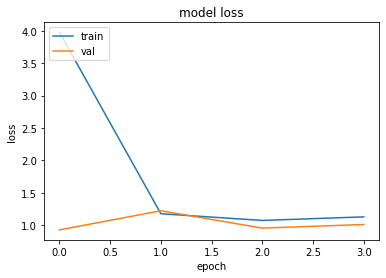

In [ ]:
import tensorflow.keras
from matplotlib import pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
np.array(train.iloc[2])

array([3.57000000e+02, 4.50000000e+01, 2.39000000e+02, 9.00000000e+01,
       7.95822250e-01, 2.28560336e+02, 2.16532128e+03, 3.85614011e+03])

In [ ]:
test1=[3.57000000e+02, 4.50000000e+01, 2.39000000e+02, 9.00000000e+01,
       7.95822250e-01, 2.28560336e+02, 2.16532128e+03, 3.85614011e+03]
test1=np.array(test1).reshape(1,8)
print(NN_model.predict(test1))
print(y.iloc[2])

[[57.383137]]
Efficiency    56.152557
Name: 2, dtype: float64


In [ ]:
NN_model.save('ANN version 3.0.h5')

In [ ]:
print(df.head())
X=df[['Thi','Tci','Tho','Tco','U','LMTD','Q_Actual','Q_Ideal']]

   Unnamed: 0  Thi  Tci  Tho  ...        LMTD      Q_Ideal     Q_Actual  Efficiency
0           0  341   41  222  ...  219.009203  2261.432388  1636.407875   72.361565
1           1  343   37  236  ...  234.053544  3956.027692  1614.572356   40.812969
2           2  357   45  239  ...  228.560336  3856.140107  2165.321282   56.152557
3           3  349   38  241  ...  237.181401  4521.612602  1297.128127   28.687290
4           4  341   31  220  ...  222.616162  2753.082218   872.495938   31.691605

[5 rows x 10 columns]


In [ ]:
from keras.models import load_model

In [ ]:
model  = load_model('ANN version 3.0.h5',compile=False)

In [ ]:
model.predict([[17.094,82.2,,28.698]])

In [ ]:
%ls

 1.PNG                         'model V1.0.h5'
 ANN_sih_Data.xls               pickle_model_accidental.pkl
'ANN version 2.0.h5'            pickle_model_maintenance.pkl
 HE_accidental.xls              pickle_model.pkl
 HE_maintenance.xls             sih_pump.csv
 HE_normal.xls                 'Supplementary Table.xlsx'
 jolib_model__Accidental.sav    TPT40_RawData_5s.gsheet
 jolib_model__Maintenance.sav   TPT40_RawData_5s.xlsx
 jolib_model__normal_0.sav     'Train 2 Weights-025--19.40311.hdf5'
 jolib_normal.sav              'Train 3 Weights-027--505.68574.hdf5'
 jolib_pump2.sav                turbine.csv
 jolib_pump.sav                 Weights-051--0.01911.hdf5
 jolib_turbinel.sav             Weights-158--0.01271.hdf5


In [ ]:
df_test = pd.read_excel('HE_normal.xls')

In [ ]:
test = df_test[['Thi','Tci','Tho','Tco','UA','LMTD','Q_Actual','Q_Ideal']]
y_test=df_test[['Efficiency']]

In [ ]:
result1=model.predict(test)

In [ ]:
from sklearn.metrics import mean_absolute_error

In [ ]:
mean_absolute_error(y_test,result1)

61.795476125539686

In [ ]:
np.mean(np.array(y_test))

73.80227627545729

In [ ]:
np.mean(np.array(result1))

12.006801

In [ ]:
#predicting Tho 
df = pd.read_excel('Light_oil_datset.xls')
print(df.shape)
df.head()
X_th=df[['Thi','Tci','U','LMTD','Q_Actual','Q_Ideal']]
y_th=df[['Tho']]

(40000, 10)


In [ ]:
#predicting Tho 
df = pd.read_excel('Light_oil_datset.xls')
print(df.shape)
df.head()
X_th=df[['Thi','Tci','U','LMTD','Q_Actual','Q_Ideal']]
y_th=df[['Tho']]
NN_model = Sequential()

# The Input Layer :
NN_model.add(Dense(512, kernel_initializer='normal',input_shape=X_th.shape[1:], activation='relu'))

# The Hidden Layers :
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(128, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(64, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(64, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(32, kernel_initializer='normal',activation='relu'))

# The Output Layer :
NN_model.add(Dense(1, kernel_initializer='normal',activation='linear'))

# Compile the network :
NN_model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])
history=NN_model.fit(X_th,y_th,batch_size=32,epochs=100,validation_split=0.3)

Epoch 1/100
875/875 [==============================] - 5s 6ms/step - loss: 15.6812 - mean_absolute_error: 15.6812 - val_loss: 5.9648 - val_mean_absolute_error: 5.9648
Epoch 2/100
875/875 [==============================] - 5s 5ms/step - loss: 6.7808 - mean_absolute_error: 6.7808 - val_loss: 5.6783 - val_mean_absolute_error: 5.6783
Epoch 3/100
875/875 [==============================] - 5s 6ms/step - loss: 6.7437 - mean_absolute_error: 6.7437 - val_loss: 5.4266 - val_mean_absolute_error: 5.4266
Epoch 4/100
875/875 [==============================] - 5s 6ms/step - loss: 6.5123 - mean_absolute_error: 6.5123 - val_loss: 5.4469 - val_mean_absolute_error: 5.4469
Epoch 5/100
875/875 [==============================] - 5s 6ms/step - loss: 6.2074 - mean_absolute_error: 6.2074 - val_loss: 6.2648 - val_mean_absolute_error: 6.2648
Epoch 6/100
875/875 [==============================] - 5s 6ms/step - loss: 5.9677 - mean_absolute_error: 5.9677 - val_loss: 5.2137 - val_mean_absolute_error: 5.2137
Epoch 7/

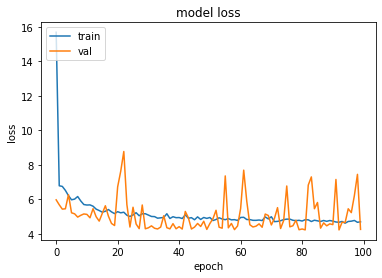

In [ ]:
import tensorflow.keras
from matplotlib import pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
NN_model.save('Temp_heat_out_V2.0.h5')

In [ ]:
NN_model.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_70 (Dense)             (None, 512)               3584      
_________________________________________________________________
dense_71 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_72 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_73 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_74 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_75 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_76 (Dense)             (None, 1)               

In [ ]:
#predicting Tho 
df = pd.read_excel('Light_oil_datset.xls')
print(df.shape)
df.head()
X_th=df[['Thi','Tci','U','LMTD','Q_Actual','Q_Ideal']]
y_th=df[['Tco']]
NN_model = Sequential()

# The Input Layer :
NN_model.add(Dense(512, kernel_initializer='normal',input_shape=X_th.shape[1:], activation='relu'))

# The Hidden Layers :
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(128, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(64, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(64, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(32, kernel_initializer='normal',activation='relu'))

# The Output Layer :
NN_model.add(Dense(1, kernel_initializer='normal',activation='linear'))

# Compile the network :
NN_model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])
history=NN_model.fit(X_th,y_th,batch_size=32,epochs=100,validation_split=0.3)

(40000, 10)
Epoch 1/100
875/875 [==============================] - 5s 5ms/step - loss: 9.5431 - mean_absolute_error: 9.5431 - val_loss: 6.9945 - val_mean_absolute_error: 6.9945
Epoch 2/100
875/875 [==============================] - 4s 5ms/step - loss: 7.3186 - mean_absolute_error: 7.3186 - val_loss: 6.8816 - val_mean_absolute_error: 6.8816
Epoch 3/100
875/875 [==============================] - 4s 5ms/step - loss: 7.2364 - mean_absolute_error: 7.2364 - val_loss: 6.7342 - val_mean_absolute_error: 6.7342
Epoch 4/100
875/875 [==============================] - 4s 5ms/step - loss: 7.2148 - mean_absolute_error: 7.2148 - val_loss: 6.8921 - val_mean_absolute_error: 6.8921
Epoch 5/100
875/875 [==============================] - 4s 5ms/step - loss: 7.0488 - mean_absolute_error: 7.0488 - val_loss: 6.5902 - val_mean_absolute_error: 6.5902
Epoch 6/100
875/875 [==============================] - 4s 5ms/step - loss: 7.0112 - mean_absolute_error: 7.0112 - val_loss: 7.1396 - val_mean_absolute_error: 7.139

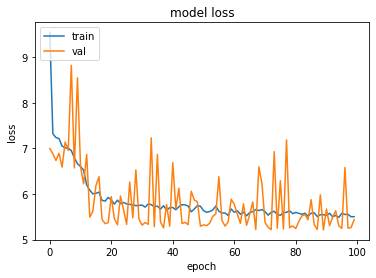

In [ ]:
import tensorflow.keras
from matplotlib import pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
NN_model.save('Temp_cold_out_V1.0.h5')

In [ ]:
X.head()

,Thi,Tci,Tho,Tco,U,LMTD,Q_Actual,Q_Ideal
0,341,41,222,79,0.487063,219.009203,1636.407875,2261.432388
1,343,37,236,70,0.797275,234.053544,1614.572356,3956.027692
2,357,45,239,90,0.795822,228.560336,2165.321282,3856.140107
3,349,38,241,74,0.899243,237.181401,1297.128127,4521.612602
4,341,31,220,81,0.583347,222.616162,872.495938,2753.082218


In [ ]:
NN_model.predict(np.array(X_th.iloc[0]).reshape(1,6))

array([[80.231285]], dtype=float32)

In [ ]:
y_th.iloc[0]

Tco    79
Name: 0, dtype: int64